# 네이버 데이터랩과 빅카인즈 뉴스 데이터 분석

### -  네이버 데이터랩

In [ ]:
#-*- coding: utf-8 -*-
import os
import sys
import urllib.request
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [205]:
client_id = "L2JBn_zTvQ1vDWWjIiJe"
client_secret = "2jnIW7nLXt"
url = "https://openapi.naver.com/v1/datalab/search"
body = {
    "startDate": "2018-03-01",
    "endDate": "2021-09-30",
    "timeUnit": "date",
    "keywordGroups": [
        {"groupName": "코로나", "keywords": ["코로나"]},
        {"groupName": "여행", "keywords": ["여행","여행","휴가","호텔","팬션","여행지","캠핑","글램핑","호캉스","당일치기여행","해외여행"]},
        {"groupName": "백신", "keywords": ["백신"]},
        {"groupName": "코로나블루", "keywords": ["코로나블루", "코로나우울", "코로나우울증", "코로나 우울증"]},
        {"groupName": "코로나확진자", "keywords": ["확진자","코로나확진자","누적확진자","코로나확진"]}
    ],
}

body = json.dumps(body)

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))

In [206]:
json_obj = json.loads(response.read().decode('utf-8'))

In [207]:
df1 = pd.DataFrame(json_obj['results'][0]['data']); df1.columns=['기간','코로나']; df1.set_index('기간')
df2 = pd.DataFrame(json_obj['results'][1]['data']); df2.columns=['기간','여행']; df2.set_index('기간')
df3 = pd.DataFrame(json_obj['results'][2]['data']); df3.columns=['기간','백신']; df3.set_index('기간')
df4 = pd.DataFrame(json_obj['results'][3]['data']); df4.columns=['기간','코로나블루']; df4.set_index('기간')
df5 = pd.DataFrame(json_obj['results'][4]['data']); df5.columns=['기간','확진자']; df5.set_index('기간')

,확진자
기간,
2018-04-20,0.00010
2018-06-19,0.00010
2018-09-08,0.00161
2018-09-09,0.00095
2018-09-10,0.00122
...,...
2021-09-26,11.09036
2021-09-27,11.02155
2021-09-28,8.75980


In [208]:
df = df1.merge(df2, how='outer', on ='기간').fillna(0)
df = df.merge(df3, how='outer', on ='기간').fillna(0)

In [209]:
df = df.merge(df4, how='outer', on ='기간').fillna(0)
df = df.merge(df5, how='outer', on ='기간').fillna(0)

In [210]:
df.head(5)
df.tail(5)

,기간,코로나,여행,백신,코로나블루,확진자
1305,2021-09-26,6.84512,0.65960,0.23571,0.01718,11.09036
1306,2021-09-27,6.99715,0.75089,0.68018,0.02356,11.02155
1307,2021-09-28,5.48114,0.69469,0.93856,0.02313,8.75980
1308,2021-09-29,4.96423,0.68073,0.84464,0.02382,7.74741
1309,2021-09-30,4.15820,0.68736,0.62925,0.02015,6.31845


In [212]:
df.to_excel('C:/Users/dajin/2021-2 capston/corona_datalab.xlsx')

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='darkgrid')

<AxesSubplot:xlabel='기간'>

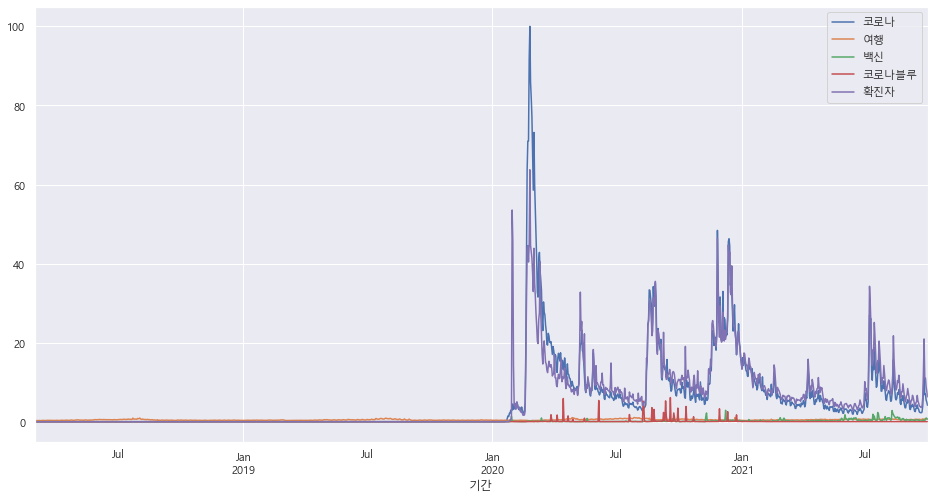

In [214]:
df_excel = pd.read_excel('C:/Users/dajin/2021-2 capston/corona_datalab.xlsx', sheet_name = 'Sheet1', index_col = '기간', parse_dates = True)
df_excel.plot(figsize=(16,8))

In [215]:
df_excel

,코로나,여행,백신,코로나블루,확진자
기간,,,,,
2018-03-01,0.00692,0.29433,0.01665,0.00000,0.00000
2018-03-02,0.00788,0.29207,0.01314,0.00000,0.00000
2018-03-03,0.00715,0.28726,0.01475,0.00000,0.00000
2018-03-04,0.00676,0.28298,0.01644,0.00000,0.00000
2018-03-05,0.00631,0.29908,0.01365,0.00000,0.00000
...,...,...,...,...,...
2021-09-26,6.84512,0.65960,0.23571,0.01718,11.09036
2021-09-27,6.99715,0.75089,0.68018,0.02356,11.02155
2021-09-28,5.48114,0.69469,0.93856,0.02313,8.75980


In [148]:
df['코로나블루'].corr(df['여행'], method ='pearson')

0.08866839196080949

In [149]:
df['코로나'].corr(df['코로나블루'], method ='pearson')

0.1175570587912083

In [216]:
df.corr(method ='pearson')

,코로나,여행,백신,코로나블루,확진자
코로나,1.000000,-0.010820,0.199378,0.119962,0.915775
여행,-0.010820,1.000000,0.205707,0.100888,0.097907
백신,0.199378,0.205707,1.000000,0.005816,0.307889
코로나블루,0.119962,0.100888,0.005816,1.000000,0.147820
확진자,0.915775,0.097907,0.307889,0.147820,1.000000


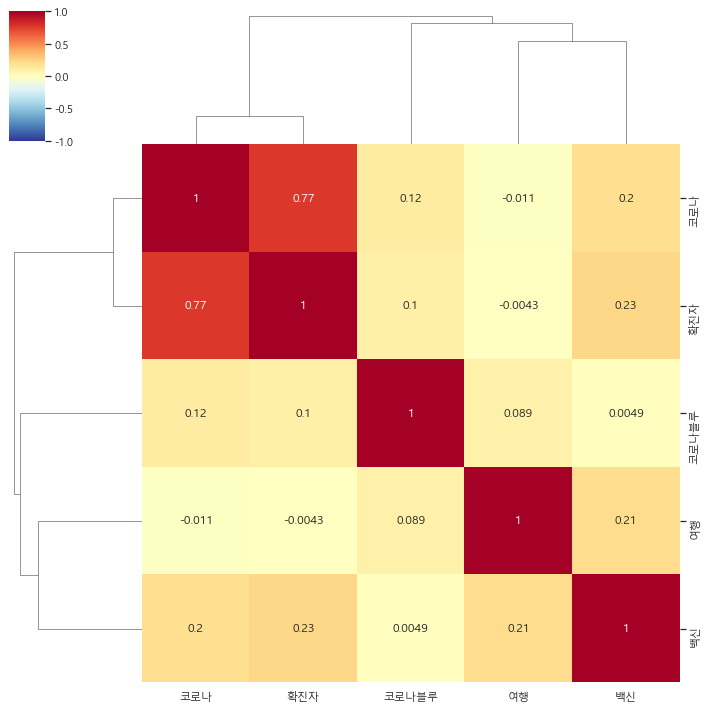

In [220]:
df = df_excel.corr()

# 히트맵을 그린다
sns.clustermap(df_cor, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

In [152]:
#상관계수의 검정 

In [153]:
import scipy.stats as stats

In [221]:
Y = df['코로나'].values
Y

array([ 1.        , -0.01082037,  0.19937813,  0.11996205,  0.9157746 ])

In [222]:
for item in['여행','백신','코로나블루','확진자']:
    print(item)
    X = df[item].values
    print('Covariance: {:.2f}'.format(np.cov(X,Y)[0,1]))
    print('Correlation: {:.2f}'.format(stats.pearsonr(X,Y)[0]))
    print('P-value:{:.4f}'.format(stats.pearsonr(X,Y)[1]))
    print('\n')

여행
Covariance: -0.12
Correlation: -0.64
P-value:0.2454


백신
Covariance: -0.02
Correlation: -0.12
P-value:0.8508


코로나블루
Covariance: -0.06
Correlation: -0.30
P-value:0.6193


확진자
Covariance: 0.20
Correlation: 0.99
P-value:0.0015




In [223]:
Y2 = df['여행'].values
Y2

array([-0.01082037,  1.        ,  0.20570718,  0.1008878 ,  0.09790659])

In [224]:
for item in['코로나','백신','코로나블루','확진자']:
    print(item)
    X = df[item].values
    print('Covariance: {:.2f}'.format(np.cov(X,Y2)[0,1]))
    print('Correlation: {:.2f}'.format(stats.pearsonr(X,Y2)[0]))
    print('P-value:{:.4f}'.format(stats.pearsonr(X,Y2)[1]))
    print('\n')

코로나
Covariance: -0.12
Correlation: -0.64
P-value:0.2454


백신
Covariance: -0.01
Correlation: -0.06
P-value:0.9208


코로나블루
Covariance: -0.04
Correlation: -0.25
P-value:0.6865


확진자
Covariance: -0.11
Correlation: -0.60
P-value:0.2862




In [225]:
#데이터 분포 확인

<AxesSubplot:>

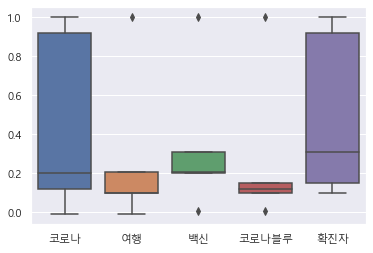

In [226]:
sns.boxplot(data= df[['코로나','여행','백신','코로나블루','확진자']])

In [227]:
df_excel.index

DatetimeIndex(['2018-03-01', '2018-03-02', '2018-03-03', '2018-03-04',
               '2018-03-05', '2018-03-06', '2018-03-07', '2018-03-08',
               '2018-03-09', '2018-03-10',
               ...
               '2021-09-21', '2021-09-22', '2021-09-23', '2021-09-24',
               '2021-09-25', '2021-09-26', '2021-09-27', '2021-09-28',
               '2021-09-29', '2021-09-30'],
              dtype='datetime64[ns]', name='기간', length=1310, freq=None)

In [228]:
#연평균 산출 
df_excel.groupby(df_excel.index.year).mean()

,코로나,여행,백신,코로나블루,확진자
기간,,,,,
2018,0.009573,0.428219,0.014262,0.000000,0.000023
2019,0.008822,0.440785,0.012330,0.000000,0.000003
2020,14.553504,0.549868,0.127661,0.239046,13.505201
2021,6.520495,0.522526,0.421480,0.025875,8.328975


In [229]:
#위의 퍼센트 변화로 변환 결과 
df_excel.groupby(df_excel.index.year).mean().pct_change()

,코로나,여행,백신,코로나블루,확진자
기간,,,,,
2018,NaN,NaN,NaN,NaN,NaN
2019,-0.078415,0.029344,-0.135447,NaN,-8.691927e-01
2020,1648.590876,0.247474,9.353388,inf,4.481270e+06
2021,-0.551964,-0.049724,2.301557,-0.891755,-3.832764e-01


In [230]:
print('여행 검색량의 경우 2018년 대비 ' + format(((0.52252 - 0.428219 )/ 0.428219)*100,".1f") +"%증감")

여행 검색량의 경우 2018년 대비 22.0%증감


In [231]:
df_excel['Year'] = df_excel.index.year; 
df_excel['Month'] = df_excel.index.month;
df_excel = df_excel.groupby([df_excel.index.year, df_excel.index.month]).mean()

In [232]:
df_excel

코로나        여행        백신     코로나블루        확진자  Year  Month
기간   기간                                                                 
2018 3    0.007545  0.314468  0.014723  0.000000   0.000000  2018      3
     4    0.008090  0.365672  0.013747  0.000000   0.000003  2018      4
     5    0.008496  0.436977  0.014010  0.000000   0.000000  2018      5
     6    0.012441  0.519747  0.013577  0.000000   0.000003  2018      6
     7    0.010955  0.632602  0.014325  0.000000   0.000000  2018      7
     8    0.011505  0.534026  0.014172  0.000000   0.000000  2018      8
     9    0.009163  0.378572  0.013634  0.000000   0.000215  2018      9
     10   0.009067  0.369855  0.014838  0.000000   0.000000  2018     10
     11   0.009978  0.356390  0.016814  0.000000   0.000013  2018     11
     12   0.008536  0.370900  0.012806  0.000000   0.000000  2018     12
2019 1    0.008444  0.372103  0.015044  0.000000   0.000015  2019      1
     2    0.007558  0.392476  0.014501  0.000000   0.000005  2019      2
     3    0.007324  0.342117  0.013901  0.000000   0.000000  2019      3
     4    0.009709  0.396230  0.012328  0.000000   0.000013  2019      4
     5    0.008321  0.458617  0.012327  0.000000   0.000000  2019      5
     6    0.010512  0.486164  0.011193  0.000000   0.000000  2019      6
     7    0.010515  0.665115  0.010955  0.000000   0.000000  2019      7
     8    0.009617  0.614188  0.010856  0.000000   0.000000  2019      8
     9    0.010122  0.396484  0.012254  0.000000   0.000000  2019      9
     10   0.008405  0.390756  0.012213  0.000000   0.000000  2019     10
     11   0.007827  0.370726  0.012000  0.000000   0.000000  2019     11
     12   0.007486  0.396106  0.010552  0.000000   0.000003  2019     12
2020 1    0.703023  0.377995  0.068743  0.000003   3.269326  2020      1
     2   28.664897  0.328770  0.070450  0.004022  17.711851  2020      2
     3   31.828006  0.371591  0.118049  0.119794  20.736085  2020      3
     4   13.224962  0.635717  0.054646  0.372324  10.387791  2020      4
     5   11.355101  0.591991  0.078131  0.056694  12.845034  2020      5
     6    7.032621  0.664503  0.048288  0.209249   8.925169  2020      6
     7    4.821374  0.854115  0.071363  0.093125   6.492749  2020      7
     8   16.786089  0.685744  0.090022  0.582262  16.845609  2020      8
     9   11.699907  0.550216  0.128456  0.848056  13.169815  2020      9
     10   7.455250  0.604780  0.126540  0.207979  10.151830  2020     10
     11  15.662987  0.481322  0.272262  0.157899  16.459623  2020     11
     12  25.976518  0.441673  0.401064  0.222351  25.175106  2020     12
2021 1   11.800975  0.364157  0.197637  0.047341  12.410460  2021      1
     2    7.208766  0.458388  0.239617  0.025093   8.333229  2021      2
     3    4.582451  0.430130  0.236885  0.025411   5.818385  2021      3
     4    6.319213  0.515858  0.240943  0.026383   8.444445  2021      4
     5    3.182177  0.536159  0.291325  0.027237   4.639311  2021      5
     6    2.867214  0.624204  0.593019  0.017084   4.236799  2021      6
     7   11.723706  0.609284  0.640038  0.022135  15.177330  2021      7
     8    6.563497  0.576132  0.913142  0.022180   9.133805  2021      8
     9    4.307335  0.587372  0.422867  0.019465   6.582817  2021      9

In [233]:
df_excel.pivot("Month", "Year", "여행")

Year,2018,2019,2020,2021
Month,,,,
1,NaN,0.372103,0.377995,0.364157
2,NaN,0.392476,0.328770,0.458388
3,0.314468,0.342117,0.371591,0.430130
4,0.365672,0.396230,0.635717,0.515858
5,0.436977,0.458617,0.591991,0.536159
6,0.519747,0.486164,0.664503,0.624204
7,0.632602,0.665115,0.854115,0.609284
8,0.534026,0.614188,0.685744,0.576132
9,0.378572,0.396484,0.550216,0.587372


Text(0.5, 1.0, '여행 검색량')

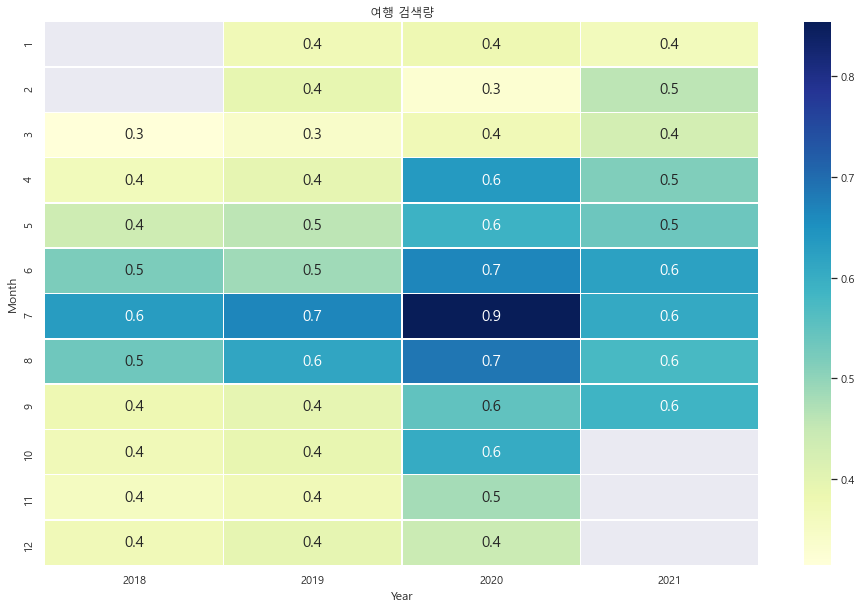

In [234]:
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(df_excel.pivot("Month", "Year", "여행"), cmap = "YlGnBu",
           annot = True, annot_kws={"size": 15}, fmt='.1f', linewidths =.5, ax= ax)
ax.set_title("여행 검색량")

Text(0.5, 1.0, '확진자 검색량')

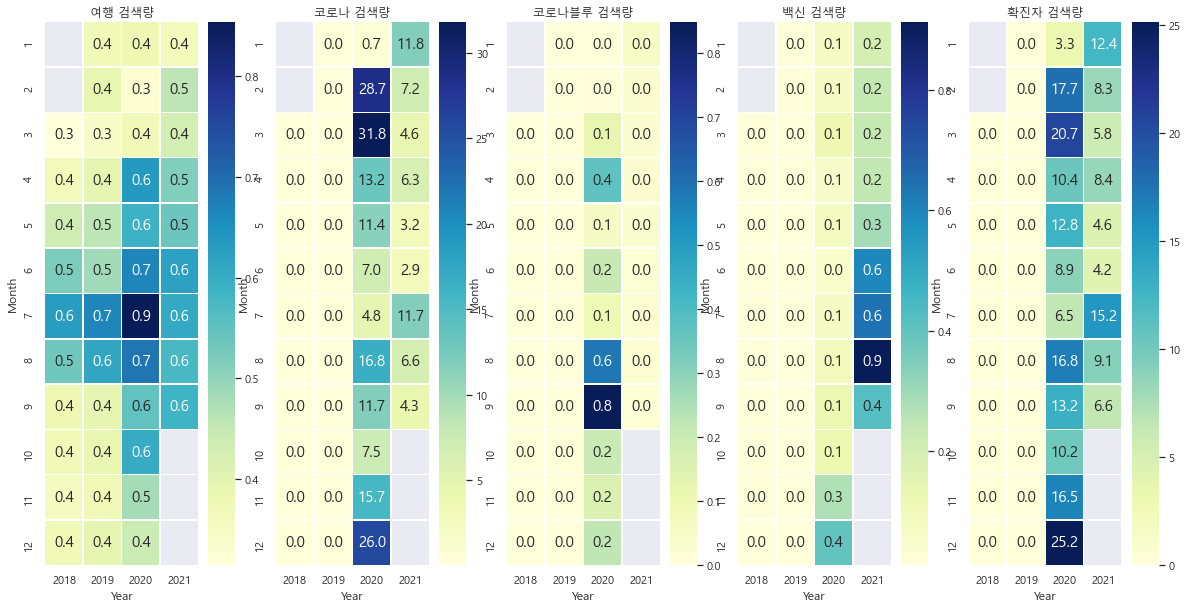

In [399]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1, 5, figsize=(20, 10))
sns.heatmap(df_excel.pivot("Month", "Year", "여행"), cmap = "YlGnBu",
           annot = True, annot_kws={"size": 15}, fmt='.1f', linewidths =.5, ax= ax1)
sns.heatmap(df_excel.pivot("Month", "Year", "코로나"), cmap = "YlGnBu",
           annot = True, annot_kws={"size": 15}, fmt='.1f', linewidths =.5, ax= ax2)
sns.heatmap(df_excel.pivot("Month", "Year", "코로나블루"), cmap = "YlGnBu",
           annot = True, annot_kws={"size": 15}, fmt='.1f', linewidths =.5, ax= ax3)
sns.heatmap(df_excel.pivot("Month", "Year", "백신"), cmap = "YlGnBu",
           annot = True, annot_kws={"size": 15}, fmt='.1f', linewidths =.5, ax= ax4)
sns.heatmap(df_excel.pivot("Month", "Year", "확진자"), cmap = "YlGnBu",
           annot = True, annot_kws={"size": 15}, fmt='.1f', linewidths =.5, ax= ax5)


ax1.set_title("여행 검색량")
ax2.set_title("코로나 검색량")
ax3.set_title("코로나블루 검색량")
ax4.set_title("백신 검색량")
ax5.set_title("확진자 검색량")

###  - 빅카인즈를 통한 코로나 관련 기사 분석 

In [237]:
#- 코로나 블루, 여행, 우울 등 한가지 이상 포함 된 기사

In [347]:
cor_df = pd.read_excel('C:/Users/dajin/2021-2 capston/NewsResult_20200101-20210930.xlsx', sheet_name = 'sheet', index_col = '일자', parse_dates = True)

C:\Users\dajin\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [401]:
cor_df.head(5)

,뉴스 식별자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
일자,,,,,,,,,,,,,,,,,,
2021-09-30,2.100101e+06,매일경제,NaN,"가을 동해바다 트레킹 지경에서 물치까지, 해파랑길을 걷다",문화>방송_연예,문화>전시_공연,문화>요리_여행,NaN,NaN,NaN,NaN,"주문진,강릉,속초,속초해맞이공원,물치항,하조대해변,하조대해,북분리해변,남애항,산티아...","삼척,남애해변,물치항,하조대해변,하조대,후진항,휴휴암,브리즈번,강원도,중광정해변,정...","트레킹,가을,동해,바다,지경,물치,해파랑길,가슴,마련,바다,동해안,가슴,양양,바닷길...","해파랑길,바닷가,하조대,양양,여행자,수산항,서피비치,휴게소,전망대,사람들,휴휴암,서...",지치고 힘들 때는 길을 걷는 것이 좋다. 길은 어디에나 있고 누구에게나 가슴 설레는...,http://news.mk.co.kr/v2/economy/view.php?year=...,NaN
2021-09-30,1.500701e+06,부산일보,이상윤,"부산시 여성문화회관, '여성 문화예술 아카데미' 수강생 모집",사회>여성,문화>전시_공연,문화>미술_건축,NaN,NaN,NaN,박형준,"부산시,라탄","아카데미,아카,여성문화회관,부산광역시","부산시,여성문화회관,아카데미,여성,문화,예술,수강,모집,팬데믹,시대,일상,부산시,시...","코로나,부산광역시,여성문화회관,문화예술,부산시,팬데믹,수강생,여성문화회관장,6회,김...",부산시(시장 박형준) 여성문화회관은 10월 1일부터 ‘2021년 여성 문화예술 아카...,http://www.busan.com/view/busan/view.php?code=...,NaN
2021-09-30,2.100801e+06,아시아경제,박종일,양천구 양천공원 등 책쉼터 ‘건축상 3관왕’ 수상...송파구민 97% 송파둘레길 '만족',지역>대전,지역>충남,지역>울산,재해>자연재해>미세먼지_황사,NaN,NaN,"한진섭 조각정원,박근호,박준희,성장현,박성수,정원오,(사)한우리독서문화운동본부,평강...","용산구립통합도서관,양천공원,탄천,상계역,서울,송파둘레,석촌호수,금호동,성동구,관악,...","네이버,은평구,국방부,강서구청,송파,꿈나무도서,강서구보건소,유튜브,대여소,한국전력공...","양천구,양천공원,3관왕,책쉼터,건축,수상,송파구민,만족,97%,송파둘레길,서울시,자...","구청장,온라인,송파둘레길,코로나19,그림책,송파구,펀딩,책쉼터,cctv,홈페이지,양...",[아시아경제 박종일 기자] 양천구(구청장 김수영)가 공원에 건립한 책쉼터로 국내 최...,https://www.asiae.co.kr/article/20210930080550...,NaN
2021-09-30,1.300101e+06,강원도민일보,최지은,"[제6회 군인가족 생활수기 대상] 슬기로운 군인,아내, 엄마",사회>여성,문화>출판,문화>방송_연예,NaN,NaN,NaN,"방탄소년단,아이키,제니퍼 로페즈","장날,광주광역시,인제군,평야,아프리카,고양시,공격개시선,경기도,광주로,인제전통시장,...","공격,육군,강원도,부대,대한민국","제6회,가족,생활,수기,대상,슬기,군인,아내,엄마,아프리카,속담,아이,마을,아이들,...","아이들,강원도,어린이집,인제군,부사관,경기도,마음속,6개월,코로나19,전투화,공격개...",아프리카 속담에 '아이 한 명을키우는데 마을 전체가 필요하다'라는 말이 있다. 나와...,www.kado.net/news/articleView.html?idxno=1093111,NaN
2021-09-29,1.400201e+06,대전일보,NaN,"[여론광장] 위드 코로나 시대, 내 마음속의 '힐링캠프' 찾기",문화>방송_연예,문화>출판,문화>종교,NaN,NaN,NaN,조창현,"아야진,지구,동해 바다,솔숲,강원도,서울양양고속도로,일,서울로","아야진해변,경기대,고성,서울,평생교육원","시대,위드,코로나,마음속,힐링캠프,상황,코로나,팬데믹,장기화,세계적,확진자,450만...","코로나,코로나19,힐링캠프,백사장,조창현,즉문즉설,경기대,서울,전문가,아야진,지구촌...",코로나 팬데믹 상황이 장기화하면서 전 세계적으로 2억 2000여 명의 확진자와 45...,http://www.daejonilbo.com/news/newsitem.asp?pk...,NaN


In [306]:
cor_df.index

DatetimeIndex(['2021-09-30', '2021-09-30', '2021-09-30', '2021-09-30',
               '2021-09-29', '2021-09-29', '2021-09-28', '2021-09-28',
               '2021-09-27', '2021-09-27',
               ...
               '2020-02-12', '2020-02-11', '2020-02-07', '2020-02-06',
               '2020-02-04', '2020-01-31', '2020-01-30', '2020-01-29',
               '2020-01-28', '2020-01-28'],
              dtype='datetime64[ns]', name='일자', length=1740, freq=None)

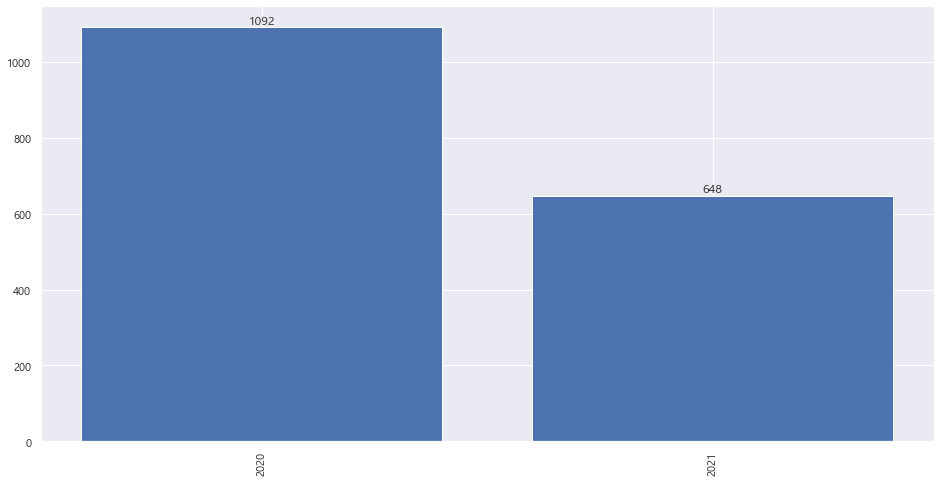

In [349]:
cor_df1 = cor_df.groupby(cor_df.index.year).size()
f, ax = plt.subplots(figsize=(16, 8)); plt.xticks(cor_df1.index, rotation = 90)
plot = ax.bar(cor_df1.index, cor_df1.values)

for rect in plot:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha ='center', va = 'bottom')

In [344]:
cor_df2 = cor_df.groupby([cor_df.index.year,cor_df.index.month]).size()
#cor_df2

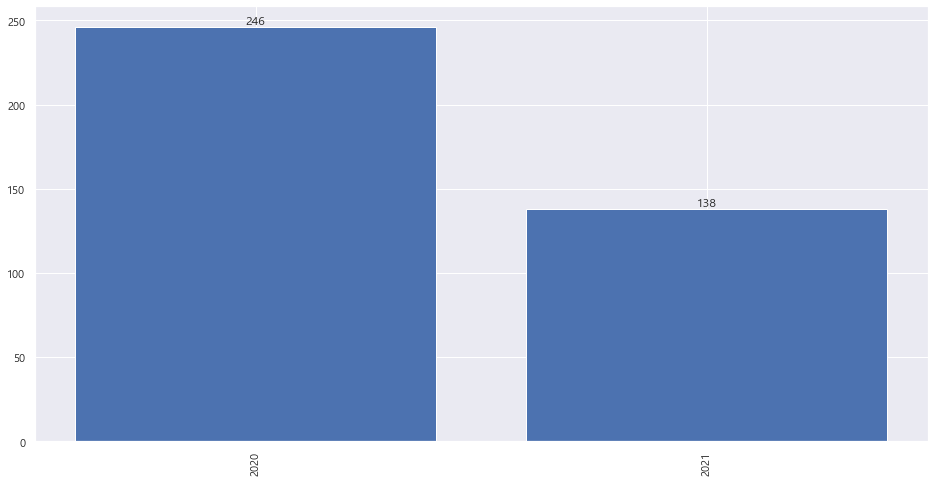

In [368]:
cor_df2 = cor_df[cor_df['제목'].str.contains('코로나블루') | cor_df['제목'].str.contains('코로나 블루') |cor_df['본문'].str.contains('코로나블루') |cor_df['본문'].str.contains('코로나 블루')]
cor_df2 = cor_df2.groupby(cor_df2.index.year).size()
f, ax = plt.subplots(figsize=(16, 8)); plt.xticks(cor_df2.index, rotation = 90)
plot = ax.bar(cor_df2.index, cor_df2.values)

for rect in plot:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha ='center', va = 'bottom')

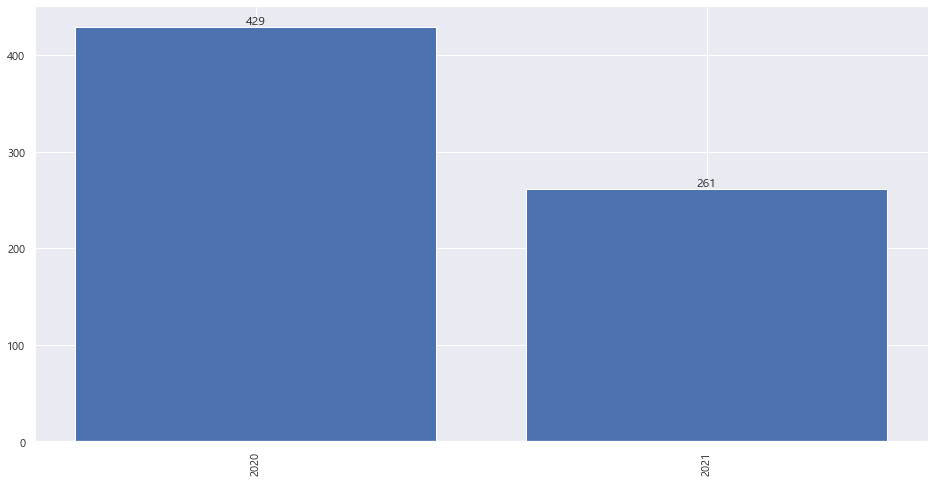

In [359]:
cor_df3 = cor_df[cor_df['제목'].str.contains('여행') | cor_df['본문'].str.contains('여행') ]
cor_df3 = cor_df3.groupby(cor_df3.index.year).size()
f, ax = plt.subplots(figsize=(16, 8)); plt.xticks(cor_df3.index, rotation = 90)
plot = ax.bar(cor_df3.index, cor_df3.values)

for rect in plot:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha ='center', va = 'bottom')

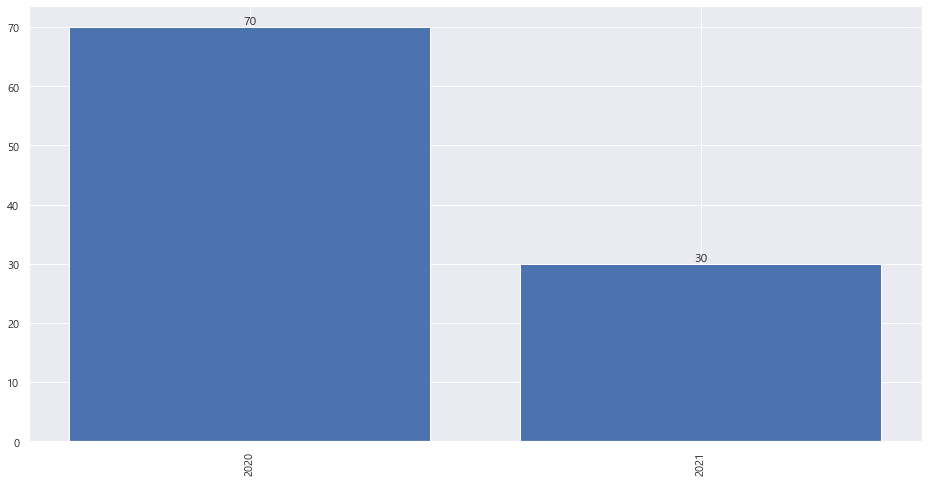

In [360]:
cor_df4 = cor_df[cor_df['제목'].str.contains('확진자') | cor_df['본문'].str.contains('확진자') ]
cor_df4 = cor_df4.groupby(cor_df4.index.year).size()
f, ax = plt.subplots(figsize=(16, 8)); plt.xticks(cor_df4.index, rotation = 90)
plot = ax.bar(cor_df4.index, cor_df4.values)

for rect in plot:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha ='center', va = 'bottom')

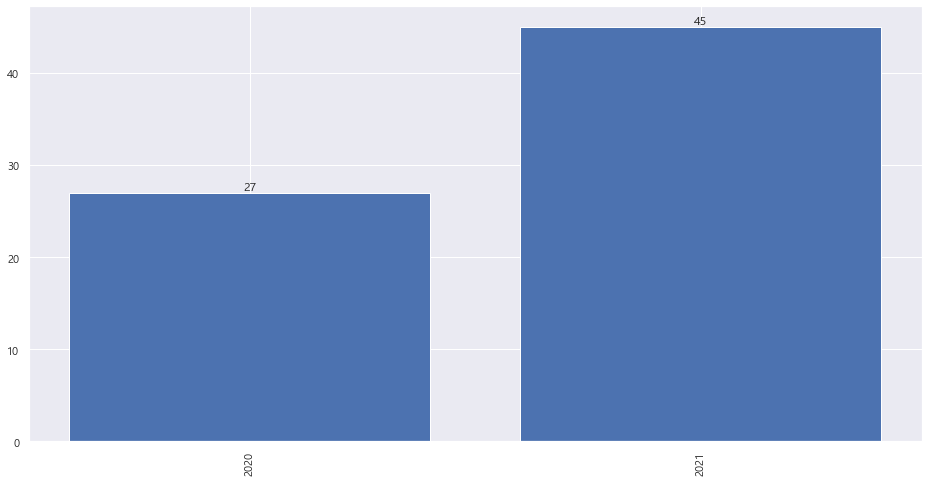

In [361]:
cor_df5 = cor_df[cor_df['제목'].str.contains('백신') | cor_df['본문'].str.contains('백신') ]
cor_df5 = cor_df5.groupby(cor_df5.index.year).size()
f, ax = plt.subplots(figsize=(16, 8)); plt.xticks(cor_df5.index, rotation = 90)
plot = ax.bar(cor_df5.index, cor_df5.values)

for rect in plot:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha ='center', va = 'bottom')

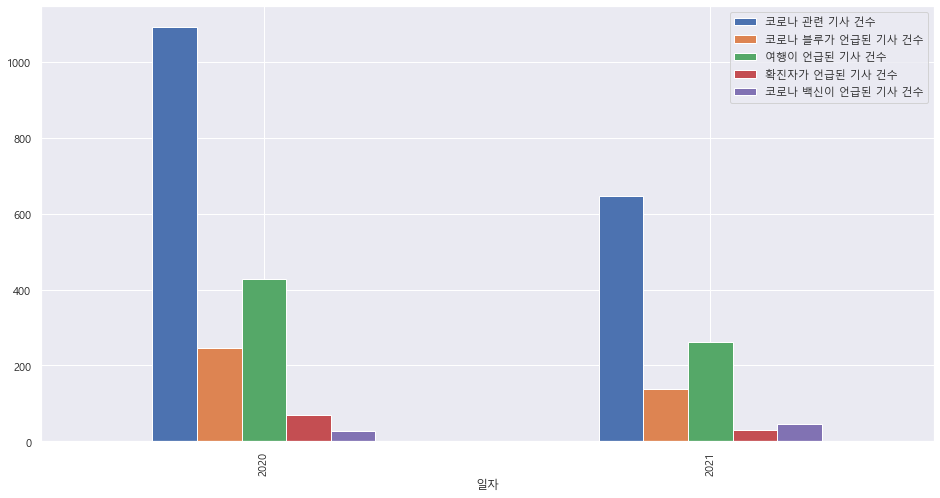

In [403]:
pd.concat([cor_df1,cor_df2,cor_df3,cor_df4,cor_df5],axis=1).plot(kind='bar', figsize=(16,8))
plt.legend(["코로나 관련 기사 건수","코로나 블루가 언급된 기사 건수","여행이 언급된 기사 건수","확진자가 언급된 기사 건수","코로나 백신이 언급된 기사 건수"])

In [383]:
print('코로나 기사 '+ str(cor_df1.sum()) + '건 중 코로나 블루가 언급된 기사'
     + str(cor_df2.sum()) +"건: " + str(format(cor_df2.sum() / cor_df1.sum() * 100, ".1f")) + "% 차지함")

코로나 기사 1740건 중 코로나 블루가 언급된 기사384건: 22.1% 차지함


In [384]:
print('코로나 기사 '+ str(cor_df1.sum()) + '건 중 여행이 언급된 기사'
     + str(cor_df3.sum()) +"건: " + str(format(cor_df3.sum() / cor_df1.sum() * 100, ".1f")) + "% 차지함")

코로나 기사 1740건 중 여행이 언급된 기사690건: 39.7% 차지함


In [392]:
from konlpy.tag import Okt
okt = Okt()

In [387]:
cor_df[['제목']].to_csv('C:/Users/dajin/2021-2 capston/blgkinds.txt', index =False, header = False)
f = open('C:/Users/dajin/2021-2 capston/blgkinds.txt','r', encoding ='UTF-8')
lines = f.readlines()
f.close()

In [393]:
word = []
for i in range(len(lines)):
    word.append(okt.nouns(lines[i]))
    
def flatten(i):
    flatList= []
    for elmt in i:
        if type(elmt) == list:
            for e in elmt:
                flatList.append(e)
        else:
            flatList.append(elmt)
    return flatList

word_list = flatten(word)
word_list = pd.Series([x for x in word_list if len(x)> 1])
word_list.value_counts().head(20)

코로나    593
여행     330
블루     216
시대      83
관광      72
힐링      64
마음      54
극복      53
문화      49
우울      43
한국      40
치유      40
소비      40
서울      39
일상      39
우리      37
호텔      35
추석      35
제주      33
세계      32
dtype: int64

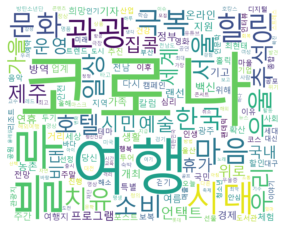

In [404]:
from wordcloud import WordCloud
from collections import Counter

# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정
font_path = 'c:/Windows/Fonts/malgun.ttf'
wc = WordCloud(width = 1000, height = 800, background_color="White", font_path=font_path)

count = Counter(word_list)
wordcloud = wc.generate_from_frequencies(count)
array = wordcloud.to_array()

plt.imshow(array, interpolation='bilinear')
plt.axis("off")
plt.show()

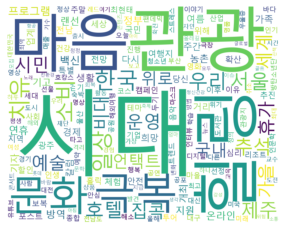

In [405]:
count.pop('코로나')
count.pop('여행')
count.pop('블루')
count.pop('우울')

wordcloud = wc.generate_from_frequencies(count)
array = wordcloud.to_array()

plt.imshow(array, interpolation='bilinear')
plt.axis("off")
plt.show()